# Jump with Chebyshev Nodes

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt
import scipy.special as sps

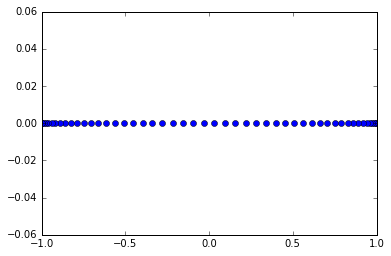

In [2]:
n = 50

k = np.arange(1, n+1, dtype=np.float64)

cheb_nodes = np.cos((2*k-1)/(2*n)*np.pi)
pt.plot(cheb_nodes, 0*cheb_nodes, "o")

Build the Vandermonde matrix for orthogonal polynomials with Chebyshev nodes:

In [3]:
V = np.array([
    sps.eval_legendre(i, cheb_nodes)
    for i in range(n)
]).T

la.cond(V)

13.082290511123743

Notice the condition number of the Vandermonde matrix! How does that compare to our prior ones?

In [4]:
def f(x):
    return (x>=0).astype(np.float64)

In [5]:
coeffs = la.solve(V, f(cheb_nodes))

In [6]:
x = np.linspace(-1, 1, 1000)

In [7]:
interpolant = 0
for i in range(n):
    interpolant += coeffs[i]*sps.eval_legendre(i, x)

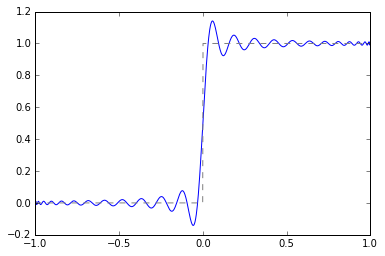

In [8]:
pt.plot(x, interpolant)
pt.plot(x, f(x), "--", color="gray")